# Introduction to CPTAC
This tutorial will introduce you to the CPTAC dataset through a Python package called `cptac` that was written to access the CPTAC data. This package is similar to `TCGAbiolinks`. The information in `cptac` is stored using `pandas` dataframes. For those curious, the CPTAC documentation is contained [here](https://pypi.org/project/cptac/).

### Installing and Importing `cptac`
Just as in R, we need to install before we can load in `cptac` to our current python environment. If you have not done so already, we need to have installed the package (you can check if it's installed by running the `import cptac` code block below). If you get an error, you will have to take the following steps:

1. Shut down your jupyter notebook kernel in the terminal with CTRL+C.
2. Make sure that you have deactivated your base environment and activated your `qbio_student` environment.
3. Run `pip install cptac`.
4. Open the tutorial again through jupyter.

### Start exploring CPTAC with `cptac`
Similar to `TCGAbiolinks`, we need to load the package and download the data:

1. Import the package (`cptac`).
2. Look at the data sets available to us with the `list_datasets()` function. As a reminder, remember the package_name.function() syntax!
3. Download the one of interest (named `Colon`).
4. Load it into our python environment.

You might get an error message warning that a method is deprecated -- you can ignore this!

In [1]:
# 1. Import cptac

import cptac
# 2. Examine the data sets available with list_datasets()

cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [2]:
# 3. Download the colorectal data set -- fill in dataset!
cptac.download(dataset='Colon')

# 4. Load the colon cancer data set
colon = cptac.Colon()

/opt/miniconda3/envs/qbio_student/lib/python3.9/site-packages/cptac/colon.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prot_combined = prot_tumor.append(prot_normal)
/opt/miniconda3/envs/qbio_student/lib/python3.9/site-packages/cptac/colon.py:153: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phos_combined = phos_tumor.append(phos_normal)


Now, we have our `colon` object containing a bunch of data. We can use the `list_data()` function the data available for the breast cancer dataset. 

Notice that in addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. Additionally, we will focus on the broad proteomics data; however, acetylproteomics and phosphoproteomics are also interesting aspects to explore. These data examine "post-translational modifications", in this case the addition of acetyl or phosphate groups to proteins after they are translated, respectively. This data can give insight into which proteins are being used in which cellular pathways.

Finally, one last caveat with the data is that many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).

**Exercise**. Call the `list_data()` function from the `colon` object to examine the different data contained in the `colon` object. Much like calling functions from a package, we can use the `colon.function()` syntax.

In [3]:
# Run the list_data() function here
colon.list_data()

Below are the dataframes contained in this dataset and their dimensions:

clinical
	210 rows
	17 columns
CNV
	105 rows
	25187 columns
derived_molecular
	110 rows
	11 columns
followup
	205 rows
	71 columns
miRNA
	105 rows
	989 columns
phosphoproteomics
	197 rows
	31339 columns
proteomics
	197 rows
	8067 columns
somatic_mutation
	93717 rows
	3 columns
somatic_mutation_binary
	106 rows
	86026 columns
transcriptomics
	106 rows
	13482 columns


**Exercise.** Now, we want to access the proteomics data. Use the `get_proteomics()` function to store the proteomics data into a separate data frame.

In [4]:
protein_data = colon.get_proteomics() # get the proteomics data
protein_data

Name,A1BG,A1CF,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZNHIT6,ZNRD1,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX,ZZEF1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO005,-1.1000,0.318,-0.487,0.0995,0.1550,0.1690,0.0653,-0.147,0.1140,0.3410,...,NaN,NaN,0.0384,0.0221,0.2500,0.0869,0.0331,NaN,-0.7330,-0.2650
01CO006,-1.1200,-0.441,-0.347,-0.0029,0.0957,0.3960,-0.0363,-0.549,0.2200,0.2480,...,NaN,0.324,NaN,-0.3940,0.0846,0.0010,-0.3450,NaN,-0.6580,0.0052
01CO008,-1.2000,0.160,-1.850,0.1190,-0.0924,0.0187,-0.2140,0.328,-0.2820,-0.3480,...,NaN,NaN,-0.3840,-0.1680,0.3570,-0.3250,0.3490,NaN,-0.8210,0.2000
01CO013,-1.8900,0.112,-0.329,0.6700,0.1160,0.3130,-0.2380,-0.274,-0.5540,0.2700,...,NaN,NaN,NaN,-0.0656,-0.2950,0.4630,-0.4480,0.0493,-0.9040,-0.1580
01CO014,-0.5230,-0.248,-0.638,0.2890,0.3780,0.8220,0.0018,-1.080,0.4980,-0.1200,...,0.0322,NaN,0.0467,0.2170,0.2360,0.2870,0.3460,NaN,-0.8120,-0.0273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006.N,-0.5950,0.430,0.727,0.0141,0.2820,0.0105,0.2780,-0.293,0.0320,0.0128,...,NaN,NaN,-0.1870,-0.1460,-0.0206,-0.2410,NaN,NaN,-0.4490,0.3200
21CO007.N,0.9770,-0.379,0.661,-0.2120,0.1320,-0.5090,0.4290,1.210,-0.2360,0.4620,...,NaN,NaN,NaN,0.2600,-0.2020,0.2860,-0.1820,NaN,1.6200,0.0584
22CO004.N,0.0542,0.406,1.070,-0.0312,0.0870,0.0428,-0.0950,0.447,0.0081,-0.0947,...,NaN,NaN,-0.3180,-0.3760,-0.1660,-0.1310,-0.7450,NaN,-0.0342,0.3270


## Analysis
We'll be analyzing the proteomics data with `numpy` and `pandas`, so we'll have to load them in as usual.

**Exercise**. Import `numpy` and `pandas`. Be sure to assign them their usual shortened names!

In [5]:
# import packages here

import numpy as np
import pandas as pd

### Short Pandas Review
We can access the rows/column names of a data frame in two ways:

1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.


**Exercise.** Print the `axes`, `index`, and `columns` of the `protein_data` object. Then, determine the dimensions of the `protein_data`, stored in the `shape` attribute. Finally, answer the following questions:

- How many rows and columns are there in the data frame?
- What do the rows and columns represent?
- How many patients are there?
- What about proteins?

In [6]:
## Explore the data frame here
protein_data.axes
protein_data.index
protein_data.columns
protein_data.shape

(197, 8067)

As for indexing, recall that `loc[]` accesses values by name, and `iloc[]` accesses values by index. `iloc[]` won't be too necessary for this data.

**Exercise.** Access the following:
1. Print the relative fold change of patient 01CO014 in the `CTNNB1` (beta-catenin) protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? How much different is it? (Hint: use `loc[]`. Be sure to specify both the rows and the columns!)
2. Access all values in the `COL4A1` column. Because this is a column, there's many ways to do so -- can you think of at least two?
3. Finally, use boolean indexing to access the patient IDs with high (≥1) `KRAS` expression:
    a. Think about if KRAS expression information will be contained in a row or a column!
    b. Create a boolean mask with the row/column that contains the expression information of KRAS.
    c. Apply the mask to the row/column names that contains the patient IDs.

In [7]:
# 1. Access cell of patient 01CO014, for the gene CTNNB1
part1 = protein_data.loc["01CO014","CTNNB1"]
assert(part1 == -0.0431)

# 2. Access all the values in the COL4A1 column
part2 = protein_data.loc[:,"COL4A1"]
assert(len(part2) == 197)

# 3. Get the patients with high KRAS expression
KRAS_mask = protein_data.loc[:,"KRAS"] >= 1
part3 = protein_data.index[KRAS_mask]
assert(part3 == "05CO028.N")


### Additional data in cptac
You can also access other data using the `cptac` python package for the same patients, using the corresponding `get` function.

**Exercise**. Access the RNA (`transcriptomics`) and `clinical` data from the colon object. The function name is very similar in syntax to the `get_proteomics()` function from before!

In [8]:
rna_data = colon.get_transcriptomics()
clinical_data = colon.get_clinical()

**Exercise**. Examine these dataframes. In particular:

- What do the values in the `rna_data` data frame represent?
- Compare the dimensions of the `protein_data`, `rna_data`, and `clinical_data`. Are they equal?

In [9]:
# explore the data frames!
print(rna_data.shape)
print(clinical_data.shape)

(106, 13482)
(210, 17)


We can use the `intersect1d()` function from `numpy` to see which patient barcodes are shared between the data frames. **The reason we might be interested in these patients is that we can compare the transcriptomics to proteomics data.**

1. Use `intersect1d()` to create a list that contains the patient IDs for each pair of data frames as mentioned below.
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [10]:
# 1.
name_intersects = [
    np.intersect1d(protein_data.index, rna_data.index), # 0. fill in intersecting for protein/rna here
    np.intersect1d(protein_data.index, clinical_data.index), # 1. fill in intersecting for protein/clinical here
    np.intersect1d(clinical_data.index, rna_data.index), # 2. fill in the intersecting for rna/clinical here
]

# 2. Print the lengths here
# write a for loop here
for i in range(len(name_intersects)):
    print(f"The length of {i} is {len(name_intersects[i])}")  # fill in here
    
# 3. Which comparison contains the patient names that have all three levels?
#the 96 samples will have all three levels
print(protein_data.shape, rna_data.shape, clinical_data.shape)

The length of 0 is 96
The length of 1 is 197
The length of 2 is 106
(197, 8067) (106, 13482) (210, 17)


### Examining the clinical data
Let's explore the clinical data in more detail.

**Exercise**. First, let's use `head()` to glance as to what data is available.

In [11]:
# call head on the clinical data!
clinical_data.head()

Name,Sample_Tumor_Normal,Age,CEA,Gender,Lymphatic_Invasion,Mucinous,Perineural_Invasion,Polyps_History,Polyps_Present,Stage,Subsite,Synchronous_Tumors,Tumor.Status,Vascular_Invasion,Vital.Status,pathalogy_N_stage,pathalogy_T_stage
Patient_ID,,,,,,,,,,,,,,,,,
01CO001,Tumor,729.0,4.9,Male,Yes,Mucinous,No,No,No,Stage III,Sigmoid Colon,No,Tumor free,Yes,Living,N2b,T4a
01CO005,Tumor,838.0,1.0,Female,No,Not Mucinous,No,Yes,Yes,Stage II,Sigmoid Colon,No,Tumor free,No,Deceased,N0,T3
01CO006,Tumor,904.0,NaN,Female,Yes,Mucinous,Yes,No,No,Stage III,Ascending Colon,Yes,With tumor,Yes,Living,N2b,T4a
01CO008,Tumor,652.0,NaN,Female,No,Mucinous,No,No,Yes,Stage II,Descending Colon,No,With tumor,No,Living,N0,T3
01CO013,Tumor,695.0,NaN,Male,No,Not Mucinous,No,Yes,No,Stage I,Sigmoid Colon,No,Tumor free,No,Living,N0,T2


**Exercise**. You might notice that the Age column values don't look like years -- they're in months. Divide the values by 12 in the `clinical_data` data frame to turn them into years. Then, use `head()` again to make sure the ages were converted.

In [12]:
# convert ages here!
clinical_data["Age"] /= 12

clinical_data.head()

Name,Sample_Tumor_Normal,Age,CEA,Gender,Lymphatic_Invasion,Mucinous,Perineural_Invasion,Polyps_History,Polyps_Present,Stage,Subsite,Synchronous_Tumors,Tumor.Status,Vascular_Invasion,Vital.Status,pathalogy_N_stage,pathalogy_T_stage
Patient_ID,,,,,,,,,,,,,,,,,
01CO001,Tumor,60.750000,4.9,Male,Yes,Mucinous,No,No,No,Stage III,Sigmoid Colon,No,Tumor free,Yes,Living,N2b,T4a
01CO005,Tumor,69.833333,1.0,Female,No,Not Mucinous,No,Yes,Yes,Stage II,Sigmoid Colon,No,Tumor free,No,Deceased,N0,T3
01CO006,Tumor,75.333333,NaN,Female,Yes,Mucinous,Yes,No,No,Stage III,Ascending Colon,Yes,With tumor,Yes,Living,N2b,T4a
01CO008,Tumor,54.333333,NaN,Female,No,Mucinous,No,No,Yes,Stage II,Descending Colon,No,With tumor,No,Living,N0,T3
01CO013,Tumor,57.916667,NaN,Male,No,Not Mucinous,No,Yes,No,Stage I,Sigmoid Colon,No,Tumor free,No,Living,N0,T2


There are actually control (non-cancer) tissue samples in the data! Let's show this using the `unique()` function from numpy.

**Exercise.** Call the `unique()` function on the `Sample_Tumor_Normal` column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [13]:
# Get the levels of the Sample_Tumor_Normal column with unique()
np.unique(clinical_data["Sample_Tumor_Normal"])

array(['Normal', 'Tumor'], dtype=object)

**Exercise.** Let's examine how tumor stage varies as a function of age:

1. Import the plotting libraries `matplotlib.pyplot` and `seaborn` (use the standard abbreviations presented last time).
2. Create an `age_category` column in `clinical_data`. As before, we'll define "Young" as under 50, and "Old" as 50 and older. (Hint: use the `where()` function from numpy, the equivalent to `ifelse()`).
3.  The "Stage" information for these patients is NaN (the pandas version of NA). Use the `isna()` function from pandas and boolean indexing (i.e. `where()` from numpy again) to replace these NaN values in the `Stage` column with "No cancer".
3. Using nested for loop and boolean indexing, count the number of old and young patients that have No cancer, Stage I, Stage II, Stage III, and Stage IV cancer. 
4. Compare your results to the barplot. Do your numbers make sense?

Old
The number of Old patients with No cancer is 100
The number of Old patients with Stage I is 12
The number of Old patients with Stage II is 40
The number of Old patients with Stage III is 43
The number of Old patients with Stage IV is 8
Young
The number of Young patients with No cancer is 0
The number of Young patients with Stage I is 0
The number of Young patients with Stage II is 2
The number of Young patients with Stage III is 5
The number of Young patients with Stage IV is 0


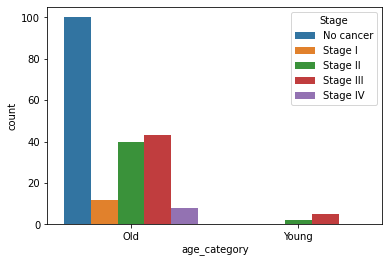

In [34]:
# 1. Import libraries here
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Create the age_category column in clinical_data

clinical_data["age_category"] = np.where(clinical_data["Age"] < 50, "Young", "Old")
# 3. Replace NaN with No cancer

clinical_data["Stage"] = np.where(clinical_data["Stage"].isna(), "No cancer", clinical_data["Stage"])

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data["Stage"])
assert(np.all(stage_categories == ['No cancer', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']))

# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    for stage in stage_categories:
        clinical_subset = clinical_data[clinical_data["age_category"] == age_cat]
        clinical_subset = clinical_subset[clinical_subset["Stage"] == stage]
        print(f"The number of {age_cat} patients with {stage} is {len(clinical_subset)}")
        
        # 1. create a subset of the data frame with the old/young patients
        # 2. count the number of patients with the stage of cancer and print


        
# 5. A sample barplot to compare your results
clinical_data_copy = clinical_data
clinical_data_copy["Stage"] = np.where(pd.isna(clinical_data["Stage"]), "No cancer", clinical_data["Stage"])
sns.countplot(
    x = "age_category",
    hue = "Stage",
    hue_order = ["No cancer", "Stage I", "Stage II", "Stage III", "Stage IV"],
    data = clinical_data_copy
)

plt.show()


## Comparing Transcriptomic and Proteomic Data
A natural question to ask is if the levels of RNA expression correlate with protein expression. We can explore this question with the help of the `scipy` library:

In [31]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets. We need to identify which genes are shared, but luckily, we already got that data before for the patients! We will use this data to create two new data frames that contain only the rows and column names that are shared between these two data sets. 

**Exercise**. To make sure the data frames match:
1. Identify the names of the genes that are shared between the two datasets (refer to the exercise when we created the dictionary). Is this data the row or column names?
2. Create the `rna_shared` and `prot_shared` data frames as described above (Hint: how can we access rows/columns by name?).
3. Finally, we need to make sure all the rows and columns are in the correct order.

In [32]:
# 1. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(rna_data.columns, protein_data.columns)

# 2. Create the two data frames
rna_shared = rna_data.loc[name_intersects[0], shared_rna_prot]
prot_shared = protein_data.loc[name_intersects[0], shared_rna_prot]

# 3. make sure that everything is in the correct order
assert(np.all(rna_shared.index == prot_shared.index))
assert(np.all(rna_shared.columns == prot_shared.columns))

# you can, in fact, chain comparisons in python
# DO NOT DO THIS IN ANY OTHER LANGUAGE
assert(rna_shared.shape == prot_shared.shape == (96, 7572))

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the `stats` library, which is `spearmanr()`. For example, to get the correlation in the KRAS gene:

The correlation is 0.078 (p = 0.461116).


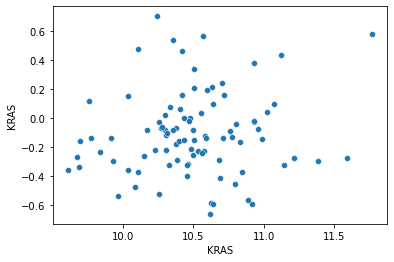

In [36]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["KRAS"], prot_shared["KRAS"], nan_policy="omit")

# round() to truncate the numbers
print(f"The correlation is {round(corr, 3)} (p = {round(pval, 6)}).")

fig, ax = plt.subplots(1,1)
sns.scatterplot(
    x = rna_shared["KRAS"],
    y = prot_shared["KRAS"],
    ax = ax

)
plt.show()

**Exercise**. Investigate the correlation between the RNA and the protein data for the CD8A gene, printing the values. Then, using seaborn, create a scatterplot, with RNA on the x-axis and protein on the y-axis (be sure to create your fig/ax!). Does the correlation look like it makes sense? As usual, be sure to label the axes!

The correlation is 0.802 (p = 0.0).


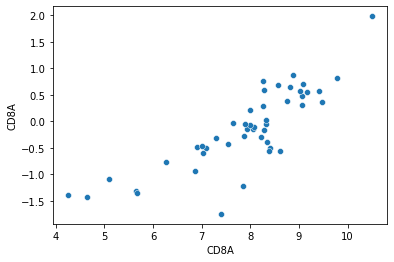

In [37]:
gene = "CD8A" # this will save you some typing and make the code more flexible for exploring other genes

# get correlation and print
corr, pval = stats.spearmanr(rna_shared[gene], prot_shared[gene], nan_policy="omit")

# round() to truncate the numbers
print(f"The correlation is {round(corr, 3)} (p = {round(pval, 6)}).")

fig, ax = plt.subplots(1,1)
sns.scatterplot(
    x = rna_shared[gene],
    y = prot_shared[gene],
    ax = ax

)
plt.show()
# create scatter plot

## Heatmaps
A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the `heatmap()` function from seaborn (the `cluster()` function is closely related; the difference is that `clustermap()` will reorganize the rows/columns so that similar rows/columns are grouped near each other). Let's do the following: 

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call `clustermap()` -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

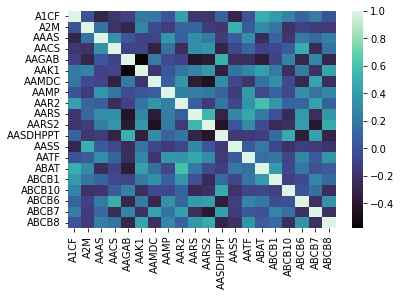

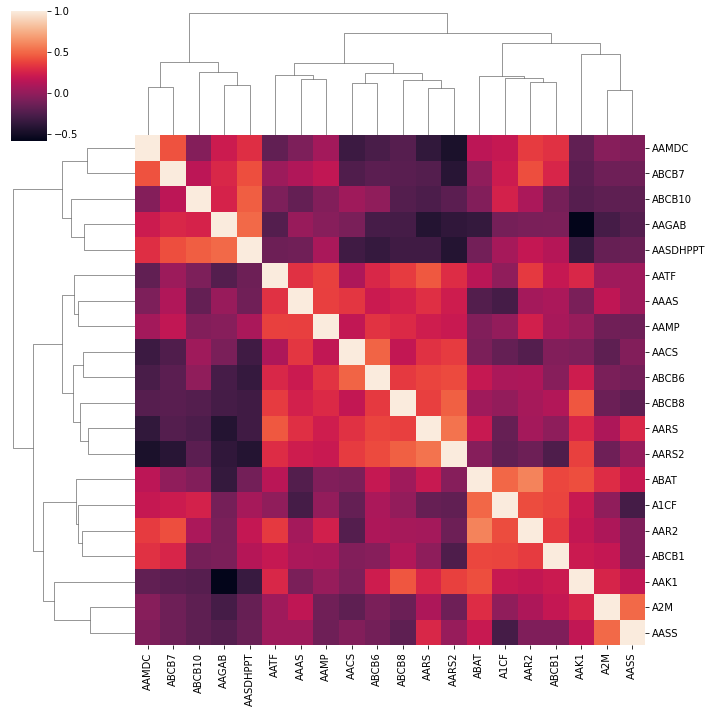

In [42]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = shared_rna_prot[0:ncomparisons] # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        corr, pval = stats.spearmanr(rna_shared[g1], rna_shared[g2], nan_policy="omit")

        # then, use .loc[] to store the correlation in corr_df
        corr_df.loc[g1, g2] = corr

# 3. create the heat map
sns.heatmap(
    corr_df,
    cmap='mako'
)

sns.clustermap(
    corr_df
)

plt.show()

# 4. interpret!

### Saving pandas dataframes
While you can certainly reload in the data every time you wish to use it, we also want to make sure you know how to save and read in a pandas dataframes. We will utilize the `to_csv()` function and `read_csv()` function. Notice in the `read_csv()` function we utilize the `index_col` argument. To observe what this argument does, try removing it and looking at the dataframe. Notice what the index values are. 

**Exercise**. To save our data:
1. Make a folder in your `analysis_data` folder called `cptac`.
2. Edit the path to save into `analysis_data`
3. Also save the RNA and clinical data as well to the same directory (with the same name convention).

In [53]:
# RENAME the path to analysis_data!
protein_data.to_csv("../analysis_data/cptac/cptac_protein.csv")
protein_data_read_example = pd.read_csv("../analysis_data/cptac/cptac_protein.csv", index_col=0)
protein_data_read_example

# Repeat with clinical and RNA
clinical_data.to_csv("../analysis_data/cptac/cptac_clinical.csv")
clinical_data_read_example = pd.read_csv("../analysis_data/cptac/cptac_clinical.csv", index_col=0)
clinical_data_read_example

rna_data.to_csv("../analysis_data/cptac/cptac_rna.csv")
rna_data_read_example = pd.read_csv("../analysis_data/cptac/cptac_rna.csv", index_col=0)
rna_data_read_example

,A1CF,A2M,A4GALT,AAAS,AACS,AADACP1,AADAT,AAED1,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO001,10.1984,13.8117,7.0224,9.4115,9.7432,4.5850,8.4635,7.6221,11.2336,8.3219,...,10.1046,10.5765,10.5294,7.0553,8.4263,8.6865,10.0307,9.1699,10.2784,10.4263
01CO005,10.1586,12.6434,6.7279,8.9972,9.9084,4.7004,8.2046,7.0768,10.5362,9.6402,...,9.6883,9.3264,9.2808,7.1799,9.2946,9.1799,9.8408,10.5622,10.4512,10.4305
01CO006,9.2119,15.0040,6.8580,9.7056,9.1997,5.0000,8.4676,7.1293,10.9337,9.5661,...,9.8424,9.8611,10.2107,7.6582,8.7415,9.0741,10.3309,10.0512,10.2703,10.5430
01CO008,10.7322,13.9284,4.9542,9.1497,8.9425,6.0224,7.4179,7.7074,10.7194,9.3376,...,9.6812,9.0795,9.5118,8.9159,9.9542,10.0168,10.3365,9.9307,10.2538,10.8925
01CO013,9.7160,12.9963,6.3576,9.6202,9.2738,4.1699,7.0980,5.9069,10.2252,9.7944,...,10.1344,9.3174,10.0238,7.4429,8.7381,9.6165,10.3848,11.3066,11.2174,10.7616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO007,10.0768,13.4762,6.4594,9.6018,9.1573,5.0000,7.6865,6.2095,10.9159,10.9315,...,10.1293,9.5622,10.2958,7.5314,8.3707,8.8202,9.8234,9.4136,9.7245,10.6777
22CO004,10.9293,12.6131,5.5236,9.3332,9.2877,5.0000,7.3663,6.8580,10.9031,8.8361,...,9.9687,9.5736,10.5108,8.4346,9.0768,8.8857,10.2715,9.4737,9.6511,10.9114
22CO006,9.2432,14.2620,7.5546,9.3264,8.7039,5.5546,7.3129,8.0389,11.1592,9.2597,...,9.8903,9.9972,10.1923,7.4998,8.1447,8.7582,10.1497,10.4062,10.2491,10.3902
